In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import numpy as np
import pandas as pd

In [2]:
from ISLP import load_data

In [3]:
K = load_data("Advertising")
K.drop('Unnamed: 0', axis=1, inplace = True)

In [4]:
K.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
K.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [6]:
intercept_col = pd.DataFrame({'intercept': [1]*len(K)})

# concatenate the intercept column to the original dataframe
df = pd.concat([intercept_col, K], axis=1)
df.head()

,intercept,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,1,17.2,45.9,69.3,9.3
3,1,151.5,41.3,58.5,18.5
4,1,180.8,10.8,58.4,12.9


In [10]:
# split data into training and testing sets
y = df['sales']  # target variable
df.drop('sales', axis=1,inplace=True)  
X = df    # features

Common heuristic: If VIF < 5, good. If VIF is in [5,10], inspect and use discretion. If VIF > 10, drop the column.

In [11]:
vals = [VIF(df, i)
        for i in range(1,df.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=df.columns[1:df.shape[1]])
vif

,vif
TV,1.004611
radio,1.144952
newspaper,1.145187


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (160, 4) (160,)
Testing set shape: (40, 4) (40,)


In [13]:
X_train.head()

,intercept,TV,radio,newspaper
79,1,116.0,7.7,23.1
197,1,177.0,9.3,6.4
38,1,43.1,26.7,35.1
24,1,62.3,12.6,18.3
122,1,224.0,2.4,15.6


In [14]:
# Create a 2D array for the independent variables
X = X_train

# Create a 1D array for the dependent variable
y = y_train

# Perform multiple linear regression
model = sm.OLS(y, X)
results = model.fit()

In [15]:
summarize(results)

,coef,std err,t,P>|t|
intercept,2.9791,0.354,8.427,0.000
TV,0.0447,0.002,28.544,0.000
radio,0.1892,0.010,19.518,0.000
newspaper,0.0028,0.007,0.392,0.696


In [91]:
# Drop newspaper
# Create a 2D array for the independent variables
X = X_train.drop('newspaper',axis=1)
#X_test.drop('newspaper', axis=1, inplace=True)

# Create a 1D array for the dependent variable
y = y_train

# Perform multiple linear regression
model = sm.OLS(y, X)
results = model.fit()

In [109]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     673.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           9.30e-78
Time:                        12:44:06   Log-Likelihood:                -306.72
No. Observations:                 160   AIC:                             619.4
Df Residuals:                     157   BIC:                             628.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0283      0.330      9.188      0.0

In [83]:
results.params

intercept    3.028255
TV           0.044728
radio        0.190667
dtype: float64

In [171]:
results.params[0]

C:\Users\shred\AppData\Local\Temp\ipykernel_7356\1855000061.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0]


3.028255250783306

In [93]:
y_train.shape, X.shape,X_test.shape

((160,), (160, 3), (40, 3))

In [103]:
y_pred = results.predict(X_test)

In [104]:
# Calculate mean squared error (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print("MSE:", mse)

# Calculate mean absolute error (MAE)
mae = np.mean(np.abs(y_pred - y_test))
print("MAE:", mae)

MSE: 3.137948009068354
MAE: 1.4443023138227566


In [105]:
y_pred = results.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print("R-squared on test set:", r2_test)

R-squared on test set: 0.9005833101920355


In [162]:
Xy_train=pd.concat([X_train,y_train],axis=1)
Xy_test=pd.concat([X_test,y_test],axis=1)

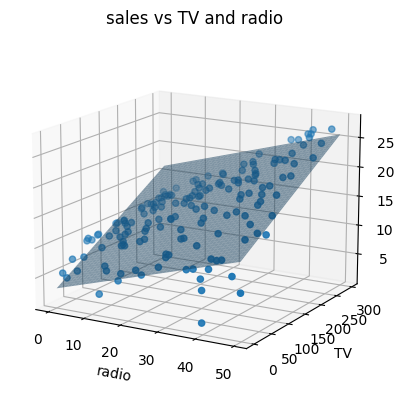

In [169]:
sales = y_train
tv = X_train['TV']
radio = X_train['radio']


intercept, coeff_tv, coeff_radio = results.params

# Create a 3D meshgrid for the regression plane
tv_range = np.linspace(min(tv), max(tv), 100)
radio_range = np.linspace(min(radio), max(radio), 100)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)
sales_grid = coeff_tv * tv_grid + coeff_radio * radio_grid + intercept

# Create a 3D scatter plot with the regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(radio, tv, sales)

# Plot the regression plane
ax.plot_surface(radio_grid, tv_grid, sales_grid, alpha=0.5)
ax.view_init(elev=15, azim=-60)
# Set axis labels and title
ax.set_xlabel('radio')
ax.set_ylabel('TV')
ax.set_zlabel('sales')
ax.set_title('sales vs TV and radio')

# Show the plot
plt.show()

C:\Users\shred\AppData\Local\Temp\ipykernel_7356\1535559835.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_pred = model_n_fit.params[0]+model_n_fit.params[1]*x + model_n_fit.params[2]*y
C:\Users\shred\AppData\Local\Temp\ipykernel_7356\1535559835.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot_surface(xx, yy,model_n_fit.params[0] + model_n_fit.params[1]*xx + model_n_fit.params[2]*yy, color='k', alpha=0.5)


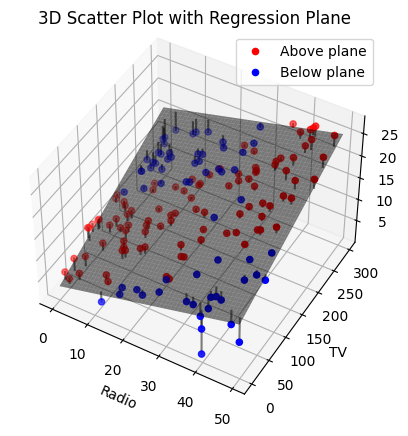

In [316]:
sales = y_train.reset_index(drop=True)
tv = X_train['TV'].reset_index(drop=True).reset_index(drop=True)
radio = X_train['radio'].reset_index(drop=True)

# Create some sample data
x = X_train['radio'].reset_index(drop=True)
y = X_train['TV'].reset_index(drop=True)
z = y_train.reset_index(drop=True)

X_ns=pd.DataFrame({'x':x,'y':y})
X_n=X_ns.reset_index(drop=True)

# Perform linear regression
X_n=MS(X_n).fit_transform(X_n)
model_n = sm.OLS(z, X_n)
model_n_fit = model_n.fit()

# Calculate predicted z-values from regression equation
z_pred = model_n_fit.params[0]+model_n_fit.params[1]*x + model_n_fit.params[2]*y

# Calculate differences between actual and predicted z-values
z_diff = z - z_pred

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the regression plane
xx, yy = np.meshgrid(np.linspace(min(radio), max(radio), 100), np.linspace(min(tv), max(tv), 100))
ax.plot_surface(xx, yy,model_n_fit.params[0] + model_n_fit.params[1]*xx + model_n_fit.params[2]*yy, color='k', alpha=0.5)
ax.view_init(elev=45, azim=300) #Adjust angle

# Plot points above the regression plane in red
ax.scatter(x[z_diff > 0], y[z_diff > 0], z[z_diff > 0], c='r', marker='o', label='Above plane')

# Plot points below the regression plane in blue
ax.scatter(x[z_diff <= 0], y[z_diff <= 0], z[z_diff <= 0], c='b', marker='o', label='Below plane')

# Add lines from the plane to the points indicating vertical distance
# For different colors, change 'c':
# Red: 'r', Blue: 'b', Green: 'g', Yellow: 'y', Cyan: 'c', Magenta:'m', Black: 'k', White: 'w'
for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y[i]], [z_pred[i], z[i]], c='k', alpha=0.5)



# Add a legend to the plot
ax.legend()


# Set axis labels and title
ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales', rotation=60)
ax.set_title('3D Scatter Plot with Regression Plane')

# Show the plot
plt.show()

C:\Users\shred\AppData\Local\Temp\ipykernel_7356\1340034770.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot_surface(xx, yy,model_n_fit.params[0] + model_n_fit.params[1]*xx + model_n_fit.params[2]*yy, color='k', alpha=0.5)


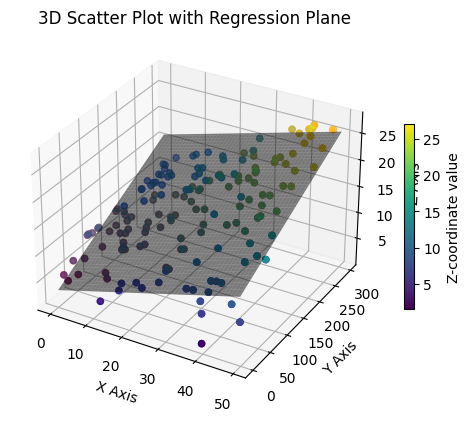

In [317]:
#Another visualization
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the regression plane
ax.plot_surface(xx, yy,model_n_fit.params[0] + model_n_fit.params[1]*xx + model_n_fit.params[2]*yy, color='k', alpha=0.5)
ax.view_init(elev=30, azim=-60) #Adjust angle

# Plot points above the regression plane in red
ax.scatter(x[z_diff > 0], y[z_diff > 0], z[z_diff > 0], c='r', marker='o', label='Above plane')

# Plot points below the regression plane in blue
ax.scatter(x[z_diff <= 0], y[z_diff <= 0], z[z_diff <= 0], c='b', marker='o', label='Below plane')


# Add a color bar to show the z-coordinate values
cmap = plt.cm.get_cmap('viridis')
sc = ax.scatter(x, y, z, c=z, cmap=cmap)
fig.colorbar(sc, shrink=0.5, label='Z-coordinate value')

# Set axis labels and title
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter Plot with Regression Plane')

# Show the plot
plt.show()

##### The positive residuals (those visible above the surface), tend to lie along the 45-degree line,
##### where TV and Radio budgets are split evenly.

##### The negative residuals (most not visible), tend to lie away from this line, where budgets are more lopsided

In [163]:
# Include interaction term in the model
allvars = list(X_train.columns.drop(['intercept','newspaper']))
y = y_train
final = allvars + [('TV', 'radio')]
X = MS(final).fit_transform(Xy_train)
X_test = MS(final).fit_transform(Xy_test)

In [154]:
# X.drop('intercept',axis=1,inplace=True)
X[:4]

,intercept,TV,radio,TV:radio
79,1.0,116.0,7.7,893.20
197,1.0,177.0,9.3,1646.10
38,1.0,43.1,26.7,1150.77
24,1.0,62.3,12.6,784.98


In [165]:
X_test[:4]

,intercept,TV,radio,TV:radio
95,1.0,163.3,31.6,5160.28
15,1.0,195.4,47.7,9320.58
30,1.0,292.9,28.3,8289.07
158,1.0,11.7,36.9,431.73


In [167]:
X.shape,X_test.shape,y_test.shape

((160, 4), (40, 4), (40,))

In [156]:
X_train.shape,y_train.shape

((160, 4), (160,))

Model 2 with interaction

In [159]:
model2 = sm.OLS(y, X)
model_final=model2.fit()
summarize(model_final)

,coef,std err,t,P>|t|
intercept,6.6850,0.280000,23.915,0.000
TV,0.0196,0.002000,11.721,0.000
radio,0.0349,0.010000,3.448,0.001
TV:radio,0.0011,0.000059,17.817,0.000


In [168]:
y_pred = model_final.predict(X_test)

# Calculate mean squared error (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print("MSE:", mse)

# Calculate mean absolute error (MAE)
mae = np.mean(np.abs(y_pred - y_test))
print("MAE:", mae)

y_pred = model_final.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print("R-squared on test set:", r2_test)

MSE: 0.8127098150754412
MAE: 0.6663640961219175
R-squared on test set: 0.974251670405071
